In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style, rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF, PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics.pairwise import cosine_similarity
import xgboost.sklearn as xgb
import xgboost as x
import gensim
import seaborn as sns
import pickle
import nlp_pipeline as nlp
import ml_functions as ml
# %load_ext autoreload
%autoreload 2
style.use('ggplot')
rcParams['font.size'] = 14
rcParams['legend.fontsize'] = 'small'
rcParams['figure.titlesize'] = 'large'

In [5]:
df = pd.read_csv('../data/train.csv')
df = df[df['Labels'] != 4].copy()
df['target'] = np.where(df['Labels'] == 5, 0, 1)
df.head(10)

,Labels,Text,Text_Tag,target
0,1,Says the Annies List political group supports ...,abortion,1
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments",1
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,1
3,1,Health care reform legislation is likely to ma...,health-care,1
4,2,The economic turnaround started at the end of ...,"economy,jobs",1
5,5,The Chicago Bears have had more starting quart...,education,0
6,0,Jim Dunnam has not lived in the district he re...,candidates-biography,1
7,2,I'm the only person on this stage who has work...,ethics,1
8,2,"However, it took $19.5 million in Oregon Lotte...",jobs,1
9,3,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",1


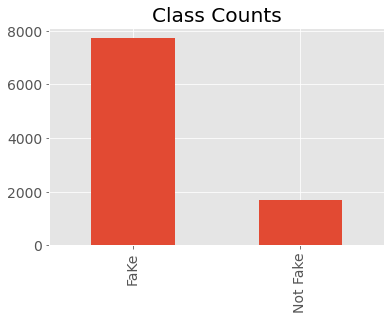

In [17]:
df.target.value_counts().plot(kind='bar')
plt.xticks(df.target.unique(), ['Not Fake','FaKe'])
plt.title('Class Counts');

In [13]:
df.target.value_counts()

1    7725
0    1676
Name: target, dtype: int64

In [18]:
corpus = df['Text'].tolist()
y = df['target']
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y.values,
                                                            test_size=0.2,
                                                            stratify=y,
                                                            random_state=42)
bow_train = [nlp.extract_bow_from_raw_text(row) for row in corpus_train]
bow_test = [nlp.extract_bow_from_raw_text(row) for row in corpus_test]

In [19]:
X_train, X_test = nlp.word_embed(bow_train, bow_test, 50)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7520, 100)
(1881, 100)
(7520,)
(1881,)


In [36]:
X_train.shape
cosim = cosine_similarity(X_train[10].reshape(1,-1), X_train)

np.min(cosim)

print("True headline:", corpus_train[10])

print("Least similar headline:", corpus_train[np.argmin(cosim)])

True headline: There was no surge in 501(c)(4) applications in 2010.
Least similar headline: Says Russian President Vladimir Putin calls me brilliant.


In [37]:
np.argwhere(y_train==0)

array([[   6],
       [  10],
       [  14],
       ...,
       [7502],
       [7505],
       [7509]])

In [38]:
np.array(corpus_train)[np.argsort(cosim)]

array([['Says Russian President Vladimir Putin calls me brilliant.',
        'On mandating health care coverage.',
        'As president, Barack Obama has never visited Israel.', ...,
        'I stopped requesting earmarks in 2008.',
        'I won the South Carolina primary in 2004, and I was way behind in the polls at this stage in 2004.',
        'There was no surge in 501(c)(4) applications in 2010.']],
      dtype='<U3192')

In [39]:
y_train[[np.argsort(cosim)]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[1, 1, 0, ..., 0, 1, 0]])